In [18]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

(30, 1, 4, 512, 512)


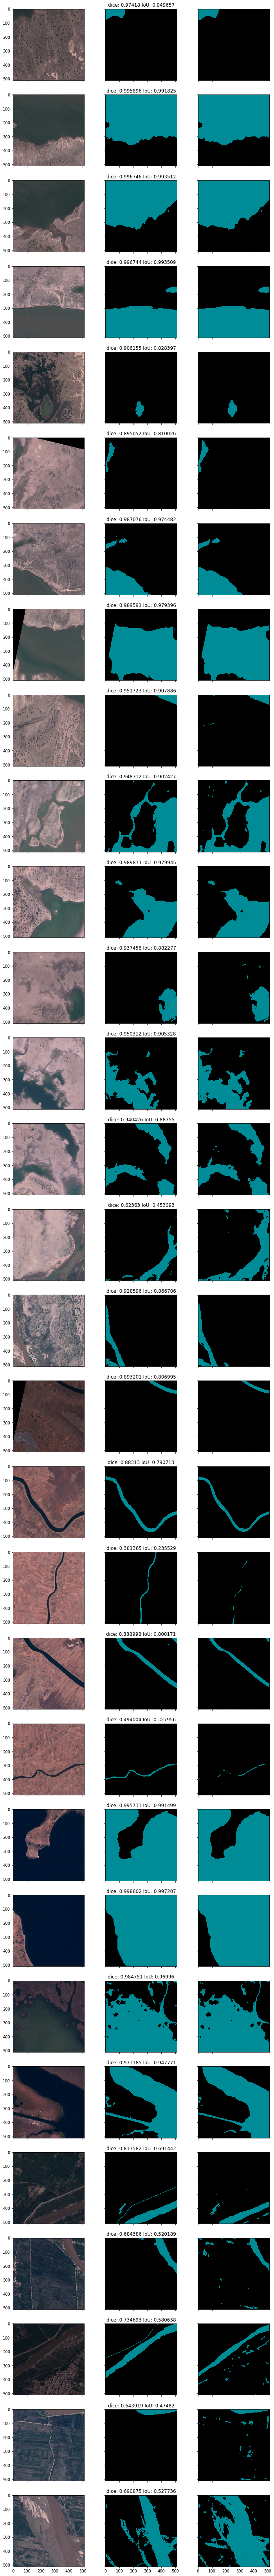

In [2]:
from plotting import  plot_prediction
plot_prediction(stage='test',name_file='_6_percent',out_file='HR',name_model='UNet11',fold_out=0,fold_in=4, count=30)


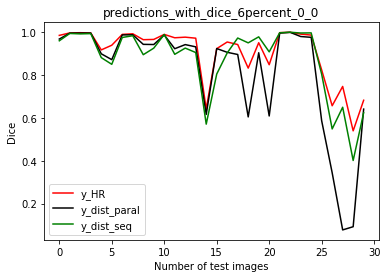

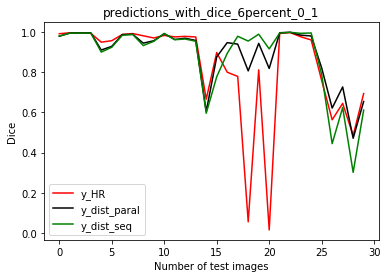

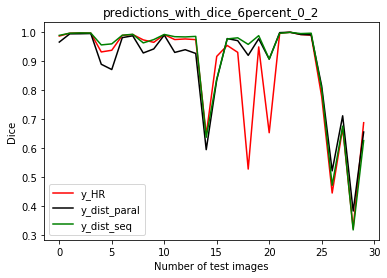

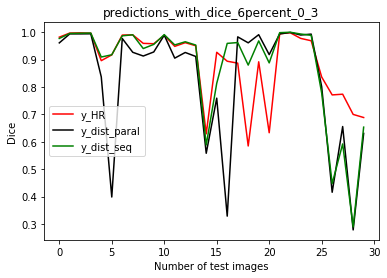

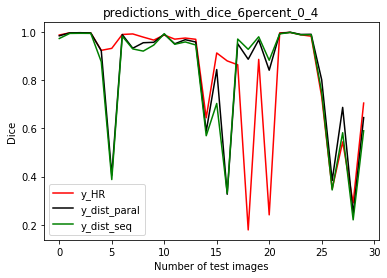

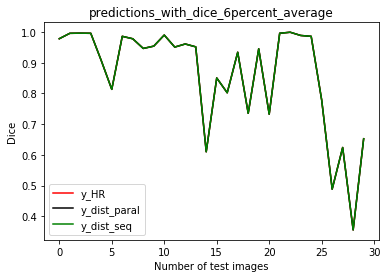

(array([0.97809913, 0.99563633, 0.9960668 , 0.99568327, 0.90680433,
        0.81329567, 0.9858504 , 0.97792467, 0.94642087, 0.95392693,
        0.98999327, 0.95086787, 0.9609318 , 0.951626  , 0.61023173,
        0.85032647, 0.80223413, 0.934052  , 0.73536887, 0.94527473,
        0.73252487, 0.99586753, 0.99914267, 0.988667  , 0.98580907,
        0.7786576 , 0.48860307, 0.624128  , 0.35595893, 0.65262987]),
 array([0.97809913, 0.99563633, 0.9960668 , 0.99568327, 0.90680433,
        0.81329567, 0.9858504 , 0.97792467, 0.94642087, 0.95392693,
        0.98999327, 0.95086787, 0.9609318 , 0.951626  , 0.61023173,
        0.85032647, 0.80223413, 0.934052  , 0.73536887, 0.94527473,
        0.73252487, 0.99586753, 0.99914267, 0.988667  , 0.98580907,
        0.7786576 , 0.48860307, 0.624128  , 0.35595893, 0.65262987]),
 array([0.973462, 0.994577, 0.995098, 0.994805, 0.876833, 0.387467,
        0.982858, 0.930205, 0.92112 , 0.946139, 0.993241, 0.949562,
        0.959215, 0.946574, 0.569537, 0.7036

In [24]:
from dice_comparation import  all_comparative_dice

all_comparative_dice(percent=[6],name_model='UNet11',fold_out=[0],fold_in=[0,1,2,3,4])
#all_comparative_dice(percent=[70],name_model='UNet11',fold_out=[0],fold_in=[0,2,4])

dice_HR_6 0.9057949999999999 [0.9057949999999999]
dice_HR_70 0.8173167333333334 [0.8173167333333334, 0.8924377999999998, 0.8861773666666668, 0.8302317666666666, 0.8385109333333333, 0.85293492, 0.8173167333333334, 0.8173167333333334]


ValueError: x and y must have same first dimension, but have shapes (1,) and (30,)

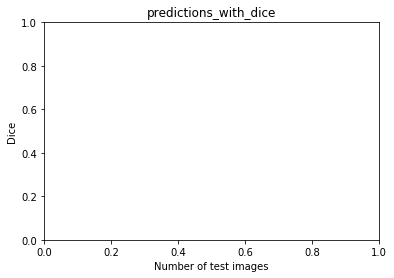

In [40]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(path, name):
    loss_file = open(path)
    filedata = loss_file.read()
    filedata = filedata.replace("bce",",bce")
    filedata = filedata.split(",")
    metric=[]
    for i in filedata:
        i = i.strip(" ")
        if str(i).startswith(name):
            i = i.split(" ")
            metric.append(float(i[1]))
    return metric

f = plt.figure()
plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_dice")

out_file= 'HR'
out_file1= 'paral'

stage='test'
name_file_HR='_6_percent'
#name_file_HR2='_25_percent'
#name_file_HR3='_45_percent'
name_file_HR4='_6_percent'
#name_file_HR5='_100_percent'

name_model='UNet11'
dice_in_6=dice_out_6=[]
#dice_in_25=dice_out_25=[]
#dice_in_45=dice_out_45=[]
dice_in_62=dice_out_62=[]
#dice_in_100=dice_out_100=[]


for i in range(1):


    for j in range(5):
        fold_out=i 
        fold_in=j


        path1=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR,name_model,fold_out, fold_in))
        #path2=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR2,name_model,fold_out, fold_in))
        #path3=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR3,name_model,fold_out, fold_in))
        path4=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file1,stage,name_file_HR4,name_model,fold_out, fold_in))
        #path5=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR5,name_model,fold_out, fold_in))

        dice_HR_6=read_data(path1, name="dice")
        dice_in_6.append(np.mean(dice_HR_6))
        print('dice_HR_6',np.mean(dice_HR_6),dice_in_6)
        
        #dice_HR_25=read_data(path2, name="dice")
        #dice_in_25.append(np.mean(dice_HR_25))
        #print('dice_HR_25',np.mean(dice_HR_25),dice_in_25)
        
        #dice_HR_45=read_data(path3, name="dice")
        #dice_in_45.append(np.mean(dice_HR_45))
        #print('dice_HR_45',np.mean(dice_HR_45),dice_in_45)

        dice_HR_70=read_data(path4, name="dice")
        dice_in_70.append(np.mean(dice_HR_70))
        print('dice_HR_70',np.mean(dice_HR_70),dice_in_70)

        #dice_HR_100=read_data(path5, name="dice")
        #dice_in_100.append(np.mean(dice_HR_100))
        #print('dice_HR_100',np.mean(dice_HR_100),dice_in_100)


        #dice_dist=read_data("/home/jgonzalez/Test_2019/Test_network/model_HR/predictions/pred_loss_HR_fake_60.txt",name="dice")
        #dice_dist_400=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake.txt",name="dice")
        #dice_dist_100=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake_60.txt",name="dice")

        #print(len(dice_HR), len(dice_dist))


        y_HR_6 = np.asarray(dice_HR_6)
        #y_HR_25 = np.asarray(dice_HR_25)
        #y_HR_45 = np.asarray(dice_HR_45)
        y_HR_70 = np.asarray(dice_HR_70)
        #y_HR_100 = np.asarray(dice_HR_100)


        #y_dist = np.asarray(dice_dist)
        #y_dist_400 = np.asarray(dice_dist_400)
        #y_dist_100 = np.asarray(dice_dist_100)


        x =np.asarray(len(y_HR_6))#len(dice_HR_6))))


        plt.plot(x,y_HR_6,'ro',label = (('model6_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_25[:26],'go',label = (('model25_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_45[:26],'g^',label = (('model45_fout{}_fin{}').format(fold_out, fold_in)))
        plt.plot(x,y_HR_70,'bs',label = (('model70_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_100,'b^',label = (('model100_fout{}_fin{}').format(fold_out, fold_in)))

        #plt.plot(x,y_dist ,'k', label = 'model_HR_60')
        #plt.plot(x,y_dist_400 ,'r', label = 'dist_93')
        #plt.plot(x,y_dist_100 ,'g', label = 'dist_60')

        plt.legend()
        plt.show()
        #f.savefig("predictions/loss_convergence_100.pdf", bbox_inches='tight')
    dice_out_6.append(np.mean(dice_in_6))
    print('dice_out_HR_6',np.mean(dice_in_6),dice_out_6)
        
    #dice_out_25.append(np.mean(dice_in_25))
    #print('dice_out_HR_25',np.mean(dice_in_25),dice_out_25)
    
    #dice_out_45.append(np.mean(dice_in_45))
    #print('dice_out_HR_45',np.mean(dice_in_45),dice_out_45)
    
    dice_out_70.append(np.mean(dice_in_70))
    print('dice_out_HR_70',np.mean(dice_in_70),dice_out_70)
    
    #dice_out_100.append(np.mean(dice_in_100))
    #print('dice_out_HR_100',np.mean(dice_in_100),dice_out_100)
    

print('dice_all_HR_6',np.mean(dice_out_6),dice_out_6)
#print('dice_all_HR_25',np.mean(dice_out_25),dice_out_25)
#print('dice_all_HR_45',np.mean(dice_out_45),dice_out_45)
print('dice_all_HR_70',np.mean(dice_out_70),dice_out_70)
#print('dice_all_HR_100',np.mean(dice_out_100),dice_out_100)


## Log of history

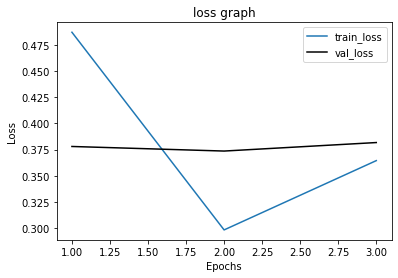

In [15]:
from plotting import  plot_history_train
plot_history_train(out_file='seq',name_file='_6_percent',name_model='UNet11',fold_out=0) #change the name output

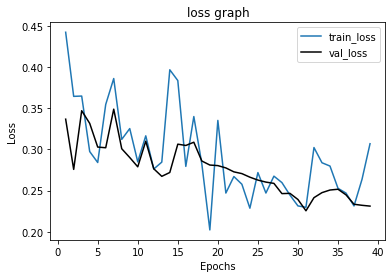

In [265]:
plot_history_train(out_file='paral',name_file='_6_percent',name_model='UNet11',fold_out=0) #change the name output

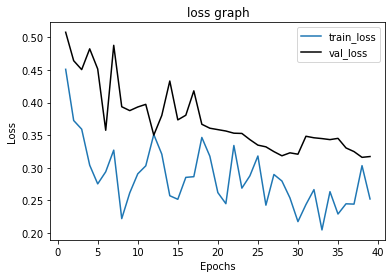

In [264]:
from plotting import plot_history_train
plot_history_train(out_file='paral',name_file='_6_percent',name_model='UNet11',fold_out=0) #change the name output

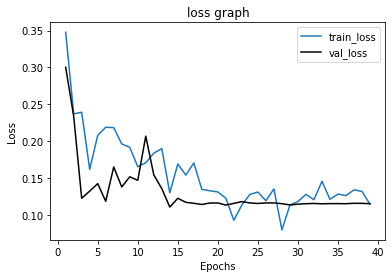

In [263]:
    file = open(("history_paral/history_model_disti_fake_60.txt"), "r")
    filedata = file.read() 
    #### distilation paral
    filedata = filedata.replace("dataloader",",dataloader")
    filedata = filedata.replace("saving",",saving")
    filedata = filedata.replace("\n",", \n")
    #### end distilation paral
    filedata = filedata.split(",")
    loss = []
    for i in filedata:
        i = i.strip(" ")
        #print(i)
        #if str(i).startswith("loss"):
        if str(i).startswith("loss:"):
            i = i.split(":")
            loss.append(float(i[1]))
            #print(i[1])            
    plt.close('all')
    f= plt.figure()  
    y_train = np.asarray(loss[0::2])
    y_val = np.asarray(loss[1::2])
    x =np.asarray(list(range(0,len(y_val))))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("loss graph")
    #plt.yticks([0,0.2,0.4,0.6,0.8,1])
    plt.plot(x[1:120:],y_train[1:120:],label = 'train_loss') ##0 has a bad value too high
    plt.plot(x[1:120:],y_val[1:120:],'k', label = 'val_loss')
    plt.legend()
    plt.show()

## Creation of data to distilation

#### create train_val_test distilation

In [145]:

from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples

n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_70perc',split = 0.45) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_45perc',split = 0.45) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_25perc',split = 0.25) #60):
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images",base_dir = "data_HR", train_n ='dist_6perc',split = 0.06) #60):

945 236 709
945 56 889


In [147]:
###create file masks
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_70percc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_70perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_45percrc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_45perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_25perc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_25perc/masks")
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/dist_6perc/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/dist_6perc/masks")

data_HR/dist_25perc/images/
data_HR/dist_6perc/images/


#### create train_val and test 

In [ ]:
from get_train_val_1 import split_train_val
from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples

split_train_val(original_dataset_dir= '/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images',base_dir = "data_HR",validation_split = 0.10, train_file='train_val_HR_dist_2',val_file='test_HR_dist_2')

In [ ]:
obtained_mask(mode="val",original_dataset_dir_train="data_HR/train_val_HR_dist_2/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/train_val_HR_dist_2/masks" ,original_dataset_dir_val="data_HR/test_HR_dist_2/images",label_dir_val='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_val="data_HR/test_HR_dist_2/masks/")

In [ ]:
from get_train_val_1 import split_train_val
from get_test_2 import split_train_test
from transfer_maks_4 import obtained_mask
from copy_samples_3 import n_samples
#de train_val_dist use 70 images with the same test dist_hr
n_samples(original_dataset_dir= "/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/train_val_HR_dist_2/images",base_dir = "data_HR", train_n ='train_val_dist_60_2',split = 0.07) #60):

In [ ]:
###create file masks
obtained_mask(mode="noall",original_dataset_dir_train="data_HR/train_val_dist_60_2/images/",label_dir_train='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/masks/',data_dir_train="data_HR/train_val_dist_60_2/masks")

### End create data to distilation

## Data initial of LR

In [ ]:
#create the dataset with the same features of the another dataset
from pathlib import Path
import numpy as np
import cv2
import gzip
import rasterio
import matplotlib.pyplot as plt
import os

data_path = Path('eopatches_png')

image_pth= data_path/'jpg'/'eopatch-{}.jpg'
#patches = glob('%s/*' % data_path)


image_name_path='/home/jgonzalez/Test_2019/Test_network/eopatches/eopatch-{}/data/BANDS-S2-L1C.npy.gz'
RGBNIR1_path='/home/jgonzalez/Test_2019/Test_network/eopatches/eopatch-{}/mask_timeless/water_label.npy.gz'


img_filename_npy_outpath = 'rgbnir{}.npy'
mask_filename_npy_outpath = 'rgbnir{}_a.npy'
#number of images 7670
# 3 red, 2 green, 1 blue, 8 nir??
for patches in range(18,19): #0372 no esta ese archivo
    img_path=str(image_name_path.format(str(patches).zfill(4)))
    f = gzip.GzipFile(img_path, "r")
    image_name=np.load(f)
    #print(image_name.shape)

    arrayRGBNIR=np.zeros((64,64,4))
    arrayRGBNIR[:,:,0]=(image_name[0,:,:,3])
    arrayRGBNIR[:,:,1]=(image_name[0,:,:,2])
    arrayRGBNIR[:,:,2]=(image_name[0,:,:,1])
    arrayRGBNIR[:,:,3]=(image_name[0,:,:,8])
    arrayRGB=arrayRGBNIR[:,:,:3]
    arrayRGBNIR=arrayRGBNIR.transpose((2, 0, 1))   #image: C X H X W  other dataset
    print(arrayRGBNIR.shape,arrayRGBNIR.dtype)
   # np.save(outpath_img_npy,arrayRGBNIR)

    print('image', arrayRGB.shape,arrayRGB.max()) # Ch,Hy,Wx tensor 
    fig = plt.figure(figsize=(30, 30))  # create a figure object
    plt.subplot(221)
    plt.imshow(arrayRGB*3.5) #2.5
    #https://github.com/sentinel-hub/eo-learn/blob/master/examples/tree-cover-keras/tree-cover-keras.ipynb

    f_a = gzip.GzipFile(str(RGBNIR1_path.format(str(patches).zfill(4))), "r")
    mask=np.load(f_a)
    print(mask.shape)
    arraymask1=(mask)#.transpose((2, 0, 1))
    #np.save(outpath_mask_npy,arraymask1)
    print("completed dataset LR")
    #print('mask', arraymask1.shape,arraymask1.dtype) # Ch,Hy,Wx tensor
        
    print('mask', arraymask1.shape,arraymask1.max(),arraymask1.min(),arraymask1.dtype) # Ch,Hy,Wx tensor
    plt.subplot(222)
    plt.imshow(arraymask1[:,:,0])

    #fig.savefig(str(image_pth).format(int(patches)))

### End data preparation LR

## mean and std LR

In [238]:
from scalarmeanstd import meanstd

train_path ="/home/jgonzalez/Test_2019/Test_network/model_LR_HR/logs_LR/mapping/train_files_LR_UNet11.npy"
val_path ="/home/jgonzalez/Test_2019/Test_network/model_LR_HR/logs_LR/mapping/val_files_LR_UNet11.npy"
test_path ="/home/jgonzalez/Test_2019/Test_network/model_LR_HR/logs_LR/mapping/val_files_LR_UNet11.npy"
data_path_LR = Path('data_LR')
train_no = np.load((train_path))
val_path = np.load((val_path))
max_values_HR, mean_values_HR, std_values_HR=meanstd(train_no, val_path,val_path,str(data_path_LR)) #_60 --data_HR, data_LR

elapsed time: 9.05499536730349
Train: data_LR 5646 min  0.002199999988079071 max  0.9570000171661377
mean:[0.11952524 0.1264638  0.13479991 0.15017026]
std:[0.08844988 0.07304429 0.06740904 0.11003125]
Val: data_LR 1411 min  0.00019999999494757503 max  0.8503999710083008
mean:[0.11703343 0.12451604 0.13325047 0.14692523]
std:[0.08791305 0.07268753 0.06659367 0.10788413]
Test: data_LR 1411 -min  0.00019999999494757503 max  0.8503999710083008
mean:[0.11703343 0.12451604 0.13325047 0.14692523]
std:[0.08791305 0.07268753 0.06659367 0.10788413]
All: data_LR 7670 min  0.0 max  1.0176000595092773
mean:[0.11946253 0.12642327 0.13482856 0.15008255]
std:[0.08853241 0.07311754 0.06746538 0.10958234]


## Data HR and Mask

In [3]:
import numpy as np
import matplotlib.pyplot as plt

0 1421 (4, 512, 512)


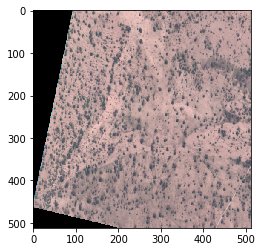

In [36]:
# IMAGES
img_path ="/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/data/images/rgbnir10-4608.npy"
img = np.load(str(img_path))
print(np.min(img), np.max(img), np.shape(img))
img=img.transpose((1, 2, 0)) 
img = (img[:,:,:3]).astype(np.float32)
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))

0.0 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (512, 512)


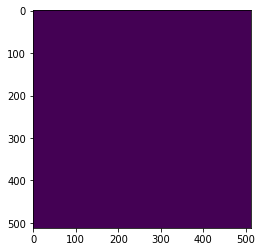

In [45]:
# MASKS
mask = np.load(str(img_path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0)
print(np.min(mask), np.max(mask))
mask=mask.transpose(1, 2, 0).reshape(mask.shape[1],-1)
mask=(mask > 0).astype(np.uint8)
plt.imshow(mask)
print(mask, mask.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


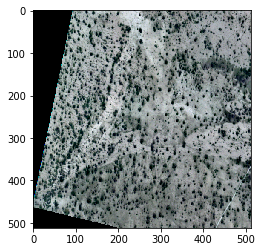

In [79]:
img=val_images[16,0,:,:].transpose((1, 2, 0)) 
img = (img[:,:,:3])
#inp = (img*255).astype(np.uint8)
plt.imshow(img/np.max(img))
print(img.shape)

(94, 1, 4, 512, 512) (94, 1, 1, 512, 512) (94, 1, 1, 512, 512)
b y_pred 0.0 0.99667907 0.4624718
b y_lb 0.0 1.0 <class 'numpy.ndarray'>
a y_pred 0.0 1.0 0.46889114
a y_lb 0.0 1.0 0.45679474
Dice =  0.9868583179141444
Jaccard =  0.9740575630867351
Dice =  tensor(0.9869)
Jaccard =  tensor(0.9741)
Dice =  [array([0.9868583], dtype=float32)]
Jaccard =  [array([0.97405756], dtype=float32)]


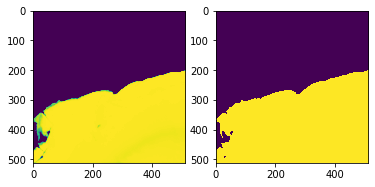

In [34]:
# Orden of the file respective/ Prediction_HR dist_60/  rgbnir104608 dice: 0.083494 IoU: 0.0
import torch
import torch.nn as nn

def dice_loss(pred, target, smooth = 1.):
    pred = pred.contiguous()
    target = target.contiguous()    
    intersection = (pred * target).sum(dim=2).sum(dim=2)
    cdice = (2. * intersection + smooth) / (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth) #1-Dice
    loss = 1 - cdice
    return loss.mean() #mean of the batch


#The Jaccard coefficient measures similarity between finite sample sets.
def metric_jaccard(pred, target):
    pred = pred.contiguous()
    target = target.contiguous()  
    epsilon= 1e-15  #epsilon! para evitar el indeterminado
    intersection = (pred*target).sum(dim=2).sum(dim=2)
    union = target.sum(dim=2).sum(dim=2) + pred.sum(dim=2).sum(dim=2) - intersection
    cjaccard = (intersection + epsilon)/ (union + epsilon)
    loss = 1 - cjaccard
    return loss.mean()#mean of the batch


def jaccard(y_true, y_pred):
    intersection = (y_true * y_pred).sum()
    union = y_true.sum() + y_pred.sum() - intersection
    return (intersection + 1e-15) / (union + 1e-15)


def dice(y_true, y_pred):
    return (2 * (y_true * y_pred).sum() + 1e-15) / (y_true.sum() + y_pred.sum() + 1e-15)


def get_jaccard(y_true, y_pred):
    epsilon = 1e-15
    intersection = (y_pred * y_true).sum(dim=-2).sum(dim=-1)
    union = y_true.sum(dim=-2).sum(dim=-1) + y_pred.sum(dim=-2).sum(dim=-1)

    return list((intersection / (union + epsilon - intersection)).data.cpu().numpy())


def get_dice(y_true, y_pred):
    epsilon = 1e-15
    intersection = (y_pred * y_true).sum(dim=-2).sum(dim=-1)
    union = y_true.sum(dim=-2).sum(dim=-1) + y_pred.sum(dim=-2).sum(dim=-1)
    return list((2 * intersection / (union + epsilon)).data.cpu().numpy())

val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_test_dist_60_94_UNet11.npy")
pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_test_dist_60_94_UNet11.npy")
val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_test_dist_60_94_UNet11.npy")

#val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_test_HR_dist_94.npy")
#pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_test_HR_dist_94.npy")
#val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_test_HR_dist_94.npy")

#val_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/inputs_val_dist_60_11.npy")
#pred_images = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/pred_val_dist_60_11.npy")
#val_label = np.load("/home/jgonzalez/Test_2019/Test_network/model_LR_HR/predictions_HR/labels_val_dist_60_11.npy")

print(val_images.shape, pred_images.shape,val_label.shape)
#print(pred_images[16,0,:,:].shape, pred_images[16,0,:,:])

#y_pred=pred_images[0,0,:,:].transpose(1,2,0)
#y_true=val_label[0,0,:,:].transpose(1,2,0)
#print('y_pred',y_pred.shape,np.min(y_pred), np.max(y_pred))
#print('y_lb',y_true.shape,np.min(y_true), np.max(y_true))






#y_pred= pred_images[0]
#y_true=val_label[0]
i=1
fig,(ax1,ax2)=plt.subplots(1,2)
ax1=plt.subplot(121)
ax1.imshow((((pred_images[i])[0].transpose(1,2,0))[:,:,0]))

print('b y_pred',np.min(pred_images[i]), np.max(pred_images[i]),np.mean(pred_images[i]))
#print('b y_pred',(pred_images[i]))
print('b y_lb',np.min(val_label[i]), np.max(val_label[i]),type(val_label[i]))

#pred_images[i]=(pred_images[i] >0).float() #!!!!! test 28 25

pred_images[i]=(pred_images[i] >0.55).astype(np.uint8) #.astype(np.float64) #!!!!! test 28
ax2=plt.subplot(122)
ax2.imshow((((pred_images[i])[0].transpose(1,2,0))[:,:,0]))
print('a y_pred',np.min(pred_images[i]), np.max(pred_images[i]),np.mean(pred_images[i]))
print('a y_lb',np.min(val_label[i]), np.max(val_label[i]),np.mean(val_label[i]))

print('Dice = ', dice(pred_images[i], val_label[i]))
print('Jaccard = ', jaccard(pred_images[i], val_label[i]))
print('Dice = ', 1-dice_loss(torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))
print('Jaccard = ',1- metric_jaccard( torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))

print('Dice = ', get_dice(torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))
print('Jaccard = ', get_jaccard( torch.from_numpy(pred_images[i]),torch.from_numpy(val_label[i])))

In [52]:
from pathlib import Path
import argparse
import cv2
import numpy as np
from tqdm import tqdm




In [ ]:
if __name__ == '__main__':

    result_dice = []
    result_jaccard = []

    for i in range(len(val_label)):
        y_true=val_label[i]
        y_pred=pred_images[i]
        #y_true = (cv2.imread(str(file_name), 0) > 255 * 0.5).astype(np.uint8)

        #pred_file_name = Path(args.target_path) / (file_name.stem.replace('_a', '') + '.png')

        #y_pred = (cv2.imread(str(pred_file_name), 0) > 255 * 0.5).astype(np.uint8)

        result_dice += [dice(y_true, y_pred)]
        result_jaccard += [jaccard(y_true, y_pred)]

    print('Dice = ', np.mean(result_dice), np.std(result_dice))
    print('Jaccard = ', np.mean(result_jaccard), np.std(result_jaccard))

### End data HR and Mask

## Create Histogram

In [ ]:
from histogram import  hist_data

fig=hist_data(files_root='/home/jgonzalez/Test_2019/Test_network/model_LR_HR/data_HR/histogram',pixel_max=3521,name='Perusat',proce='Light')


### End create

## Create graphic Compare results HR and Combined Model 

dice_all_HR_6 nan []
dice_all_HR_70 nan []


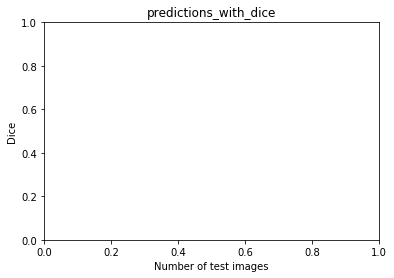

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(path, name):
    loss_file = open(path)
    filedata = loss_file.read()
    filedata = filedata.replace("bce",",bce")
    filedata = filedata.split(",")
    metric=[]
    for i in filedata:
        i = i.strip(" ")
        if str(i).startswith(name):
            i = i.split(" ")
            metric.append(float(i[1]))
    return metric

f = plt.figure()
plt.xlabel("Number of test images")
plt.ylabel("Dice")
plt.title("predictions_with_dice")

out_file= 'HR'
#out_file1= 'paral'

stage='test'
name_file_HR='_6_percent'
#name_file_HR2='_25_percent'
#name_file_HR3='_45_percent'
name_file_HR4='_70_percent'
#name_file_HR5='_100_percent'

name_model='UNet11'
dice_in_6=dice_out_6=[]
#dice_in_25=dice_out_25=[]
#dice_in_45=dice_out_45=[]
dice_in_70=dice_out_70=[]
#dice_in_100=dice_out_100=[]


for i in range(0):
    dice_in_6=[]
    dice_in_25=[]
    dice_in_45=[]
    dice_in_70=[]
    dice_in_100=[]

    for j in range(5):
        fold_out=i 
        fold_in=j


        path1=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR,name_model,fold_out, fold_in))
        #path2=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR2,name_model,fold_out, fold_in))
        #path3=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR3,name_model,fold_out, fold_in))
        path4=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR4,name_model,fold_out, fold_in))
        #path5=(("predictions_{}/pred_loss_{}{}_{}_foldout{}_foldin{}.txt").format(out_file,stage,name_file_HR5,name_model,fold_out, fold_in))

        dice_HR_6=read_data(path1, name="dice")
        dice_in_6.append(np.mean(dice_HR_6))
        print('dice_HR_6',np.mean(dice_HR_6),dice_in_6)
        
        #dice_HR_25=read_data(path2, name="dice")
        #dice_in_25.append(np.mean(dice_HR_25))
        #print('dice_HR_25',np.mean(dice_HR_25),dice_in_25)
        
        #dice_HR_45=read_data(path3, name="dice")
        #dice_in_45.append(np.mean(dice_HR_45))
        #print('dice_HR_45',np.mean(dice_HR_45),dice_in_45)

        dice_HR_70=read_data(path4, name="dice")
        dice_in_70.append(np.mean(dice_HR_70))
        print('dice_HR_70',np.mean(dice_HR_70),dice_in_70)

        #dice_HR_100=read_data(path5, name="dice")
        #dice_in_100.append(np.mean(dice_HR_100))
        #print('dice_HR_100',np.mean(dice_HR_100),dice_in_100)


        #dice_dist=read_data("/home/jgonzalez/Test_2019/Test_network/model_HR/predictions/pred_loss_HR_fake_60.txt",name="dice")
        #dice_dist_400=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake.txt",name="dice")
        #dice_dist_100=read_data("/home/jgonzalez/Test_2019/Test_network/model_LR_HR_paralel/predictions/pred_loss_dist_paral_fake_60.txt",name="dice")

        #print(len(dice_HR), len(dice_dist))


        y_HR_6 = np.asarray(dice_HR_6)
        #y_HR_25 = np.asarray(dice_HR_25)
        #y_HR_45 = np.asarray(dice_HR_45)
        y_HR_70 = np.asarray(dice_HR_70)
        #y_HR_100 = np.asarray(dice_HR_100)


        #y_dist = np.asarray(dice_dist)
        #y_dist_400 = np.asarray(dice_dist_400)
        #y_dist_100 = np.asarray(dice_dist_100)


        x =np.asarray(list(dice_HR_6))#len(dice_HR_6))))


        plt.plot(x,y_HR_6,'ro',label = (('model6_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_25[:26],'go',label = (('model25_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_45[:26],'g^',label = (('model45_fout{}_fin{}').format(fold_out, fold_in)))
        plt.plot(x,y_HR_70,'bs',label = (('model70_fout{}_fin{}').format(fold_out, fold_in)))
        #plt.plot(x,y_HR_100,'b^',label = (('model100_fout{}_fin{}').format(fold_out, fold_in)))

        #plt.plot(x,y_dist ,'k', label = 'model_HR_60')
        #plt.plot(x,y_dist_400 ,'r', label = 'dist_93')
        #plt.plot(x,y_dist_100 ,'g', label = 'dist_60')

        plt.legend()
        plt.show()
        #f.savefig("predictions/loss_convergence_100.pdf", bbox_inches='tight')
    dice_out_6.append(np.mean(dice_in_6))
    print('dice_out_HR_6',np.mean(dice_in_6),dice_out_6)
        
    #dice_out_25.append(np.mean(dice_in_25))
    #print('dice_out_HR_25',np.mean(dice_in_25),dice_out_25)
    
    #dice_out_45.append(np.mean(dice_in_45))
    #print('dice_out_HR_45',np.mean(dice_in_45),dice_out_45)
    
    dice_out_70.append(np.mean(dice_in_70))
    print('dice_out_HR_70',np.mean(dice_in_70),dice_out_70)
    
    #dice_out_100.append(np.mean(dice_in_100))
    #print('dice_out_HR_100',np.mean(dice_in_100),dice_out_100)
    

print('dice_all_HR_6',np.mean(dice_out_6),dice_out_6)
#print('dice_all_HR_25',np.mean(dice_out_25),dice_out_25)
#print('dice_all_HR_45',np.mean(dice_out_45),dice_out_45)
print('dice_all_HR_70',np.mean(dice_out_70),dice_out_70)
#print('dice_all_HR_100',np.mean(dice_out_100),dice_out_100)


## End graphic

## Plot graphic Mask + Images

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rasterio as rio
import cv2


def mask_overlay(image, mask, color=(15, 15, 0)):
    """
    Helper function to visualize mask on the top of the car
    """
    print(mask.shape)      
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    mask = mask.astype(np.float32)

    weighted_sum = cv2.addWeighted(mask, 0.3, image, 0.7, 0.)
    img = image.copy()
    ind = mask[:, :, 0] > 0  
    img[ind] = weighted_sum[ind]  
 #########################################
   # mapRGB = mask.astype(np.float32)

    ##Preprocesar la imagen original
    #out=np.asarray(image)
    #out=out.astype(np.float32)
    #outFinal=out*0.5 +mapRGB*0.5

    return img


def print_stat(root_img, maximunValue=3413):

    im_pths =np.array(sorted(list(root_img.glob('*.npy'))))
    print(np.shape(im_pths))

    for path in im_pths:
        image = np.load(str(path)) # 
        arrayRGB=image.transpose(1,2,0).astype(np.float32)
        
        arrayRGB=(arrayRGB[:,:,:3]/arrayRGB.max()) ####

        print('image', arrayRGB.shape) # Ch,Hy,Wx tensor    

        mask= np.load(str(path).replace('images', 'masks').replace(r'.npy', r'_a.npy'), 0)
        arraymask=(mask > 0).astype(np.uint8)
        arraymask=mask.transpose(1,2,0).astype(np.float32)
        arraymask=(arraymask[:,:,0])  #importante uint8
        print('mask', arraymask.shape) # Ch,Hy,Wx tensor

        fig = plt.figure(figsize=(30, 30))  # create a figure object
        plt.subplots_adjust(hspace=0.2, wspace=0.2)
        ax1=plt.subplot(131)
        ax1.imshow(arrayRGB)
        ax2=plt.subplot(132)
        ax2.imshow(arraymask)
        
        mask2 = (arraymask >0.5)
        ax3=plt.subplot(133)
        print(arraymask.dtype,mask2.dtype)
        ax3.imshow(mask_overlay(arrayRGB, mask2))

        fig.savefig(str(path).replace(r'.npy', r'_f.png'))
        
from pathlib import Path
import timeit

data_path = Path('data')
train_root_img= data_path/'train'/'images'
print_stat(train_root_img,3521)

### Cross Validation


In [58]:
from get_train_test_kfold import get_split_out,percent_split,get_split_in
from pathlib import Path
import numpy as np
percent=0.06
name_file= '_6_percent'
out_file='HR'
name_model='UNet11'
fold_out=1
fold_in=4 
data_path=Path('data_HR')
data_all='data'
    # cross validation K-fold train test
train_val_file_names, test_file_names = get_split_out(data_path,data_all,fold_out)

if percent !=1:
    extra, train_val_file_names= percent_split(train_val_file_names, percent )
    #################################################################################  
    
train_file_names,val_file_names = get_split_in(train_val_file_names,fold_in)   

756 45 711


In [59]:
from scalarmeanstd import  meanstd
data_path='data_HR'
max_values, mean_values, std_values=meanstd(train_file_names, val_file_names,test_file_names,str(data_path)) #_60 --data_HR, data_LR


elapsed time: 2.947911763563752
Train: data_HR 36 min  0 max  3491
mean:[0.09307708 0.0881693  0.10285255 0.11265558]
std:[0.0882418  0.06647132 0.05726558 0.11105127]
Val: data_HR 9 min  0 max  3273
mean:[0.15053366 0.13122193 0.13867065 0.18107343]
std:[0.10269673 0.07880677 0.06837236 0.11648802]
Test: data_HR 189 -min  0 max  3351
mean:[0.11804729 0.10664872 0.117485   0.14181574]
std:[0.09237131 0.06975801 0.06006769 0.11186236]
All: data_HR 945 min  0 max  3521
mean:[0.11383374 0.10310764 0.11405758 0.13963067]
std:[0.08972336 0.06713878 0.05742005 0.11076992]


In [65]:
from metrics_prediction_2 import find_metrics
from models import UNet11, UNet, AlbuNet34,SegNet
import torch
import glob  ###

num_classes=1
model = UNet11(num_classes=num_classes)


PATH = ('logs_{}/mapping/model_40epoch{}_{}_fold{}.pth').format(out_file,name_file,name_model,fold_out)      
model.cuda()
model.load_state_dict(torch.load(PATH))
model.eval()   # Set model to evaluate mode
####old test
test_file_names  =np.array(sorted(glob.glob(('data_HR/test_915/images') + "/*.npy")))
####
max_values_all_data=3521

mean_values=(0.14103511, 0.12471362, 0.13368856, 0.16510106)
std_values=(0.09701856, 0.07427741, 0.06466013, 0.11356985) 
#find_metrics(train_file_names,val_file_names, test_file_names, max_values_all_data, mean_values, std_values,fold_out=fold_out, fold_in=fold_in,model=model,  name_model='UNet11', out_file=out_file,dataset_file='HR' ,name_file=name_file)

30
Training_HR
Dice =  0.8939084940486484 0.24280283801429825
Jaccard =  0.8654770768351026 0.26694376241739826 

Validation_HR
Dice =  0.845608631769816 0.2257144019951937
Jaccard =  0.7867921259668138 0.2823263245316983 

Test_HR
Dice =  0.8427990714708964 0.3228796889239407
Jaccard =  0.8175157566865285 0.3207980945565928 



(30, 1, 4, 512, 512)


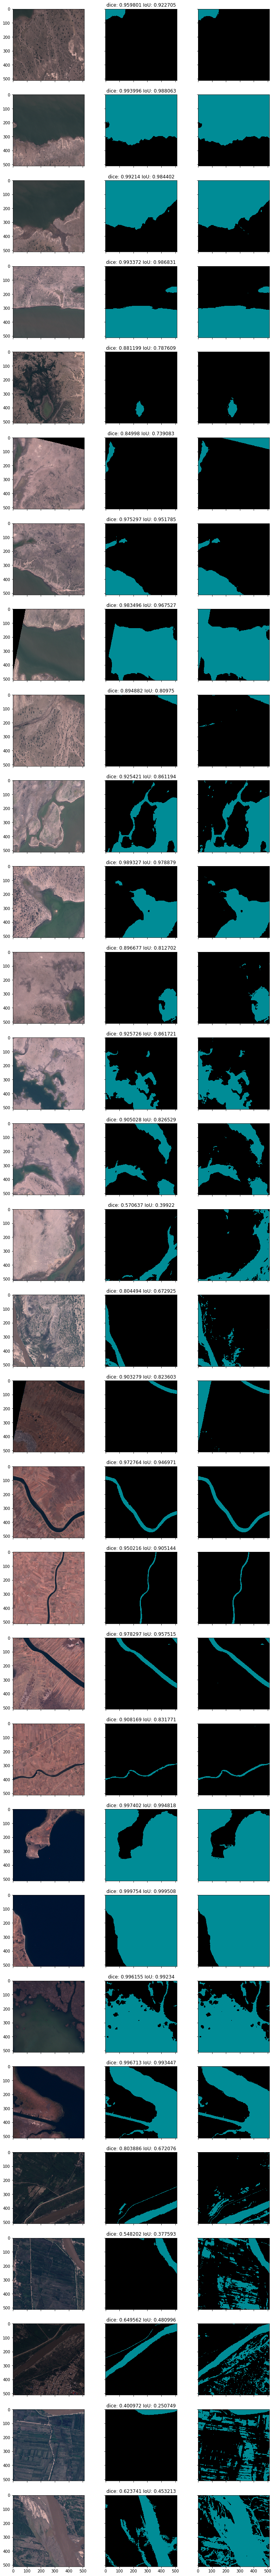

In [15]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from plotting import plot_prediction

plot_prediction(stage='test',name_file='_6_percent',out_file='seq',name_model='UNet11',fold_out=0,fold_in=0, count=30)

#plot_prediction(stage='test',name_file='_6_percent',out_file='paral',name_model='UNet11',fold_out=0,fold_in=1, count=30)
#plot_prediction(stage='test',name_file=name_file,out_file=out_file,name_model=name_model,fold_out=fold_out,fold_in=fold_in, count=30)